# Multi Objective Optimization

In [1]:
from wpaf_opt import *
import time

start_time = time.time()

x, moo_res_best, p_best, op_obj = wpaf_multi_opt()

print('Execution time:', (time.time() - start_time)/60, 'minutes')

Execution time: 110.15613468488057 minutes


In [2]:
import pandas as pd

X_all = moo_res_best.pop.get("X")
F_all = moo_res_best.pop.get("F")

df_X = pd.DataFrame(X_all)
df_F = pd.DataFrame(F_all)
df = pd.concat([df_X, df_F], axis=1)
df = df.set_axis(['capture_width', 'pen_diameter', #'pen_height', 
                  'stock_density', 
                  'obj1', 'obj2'], axis=1)

#save data to xlsx format
timestr = time.strftime("%Y%m%d_%H%M%S")
filepath_archive = 'archived_results/moo_results/moo_results_best_pop_' + timestr + '.xlsx'
df.to_excel(filepath_archive, index=False, sheet_name = timestr)
filepath = 'results/moo_results/moo_results_best_pop' + '.xlsx'
df.to_excel(filepath, index=False, sheet_name = timestr)



X = moo_res_best.X
F = moo_res_best.F

df_X = pd.DataFrame(X)
df_F = pd.DataFrame(F)
df = pd.concat([df_X, df_F], axis=1)
df = df.set_axis(['capture_width', 'pen_diameter', #'pen_height', 
                  'stock_density', 
                  'obj1', 'obj2'], axis=1)

#save data to xlsx format
# timestr = time.strftime("%Y%m%d_%H%M%S")
filepath_archive = 'archived_results/moo_results/moo_results_best_' + timestr + '.xlsx'
df.to_excel(filepath_archive, index=False, sheet_name = timestr)
filepath = 'results/moo_results/moo_results_best' + '.xlsx'
df.to_excel(filepath, index=False, sheet_name = timestr)

# print("Non Dominant Objective Functions=\n", moo_res_best.F)
# print("Non Dominant Design Variables=\n", moo_res_best.X)

# Pareto Front

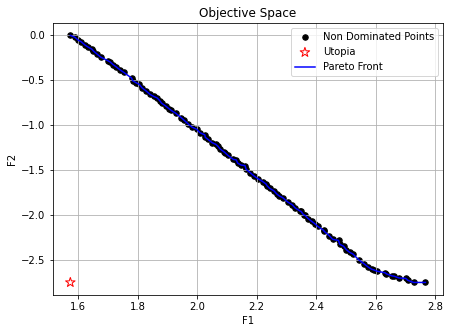

In [3]:
import matplotlib.pyplot as plt

F_all = moo_res_best.pop.get("F")

approx_ideal = moo_res_best.F.min(axis=0)
approx_nadir = moo_res_best.F.max(axis=0)

plt.figure(figsize=(7, 5))
#plt.scatter(F_all[:, 0], F_all[:, 1], s=30, facecolors='grey', edgecolors='grey', label="Dominant Points")
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='black', edgecolors='black', label="Non Dominated Points")
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Utopia")
plt.plot(np.sort(moo_res_best.F[:,0]), np.sort(moo_res_best.F[:, 1])[::-1], color='blue', label="Pareto Front")
#plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()

name='pareto_f'
plt.savefig('archived_results/moo_results/' + name +'_' + timestr + '.pdf', bbox_inches = "tight")
plt.savefig('results//moo_results/' + name + '.pdf' )
plt.savefig('results//moo_results/' + name + '.png', bbox_inches = "tight")

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


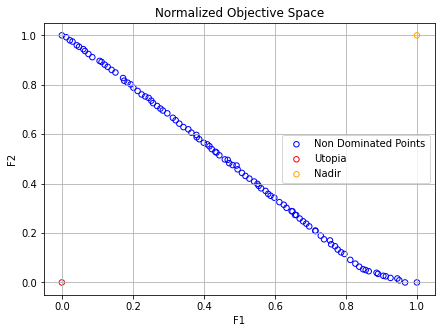

In [4]:
nF = (moo_res_best.F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue', label='Non Dominated Points')
plt.scatter(0, 0, s=30, facecolors='none', edgecolors='red', label='Utopia')
plt.scatter(1, 1, s=30, facecolors='none', edgecolors='orange', label='Nadir')
plt.title("Normalized Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()

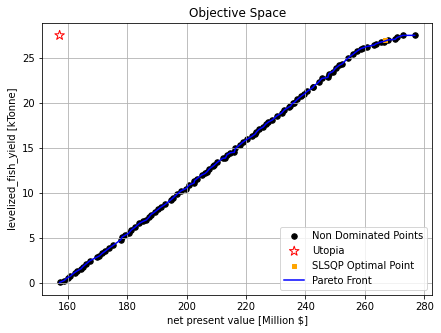

In [5]:
# coefficients are defined based on minimization (1) and maximization (-1).
f1_coeff = 100 #1 for cost_per_yield
f2_coeff = -10

f1 = f1_coeff * moo_res_best.F[:, 0]
f2 = f2_coeff * moo_res_best.F[:, 1]
approx_ideal_tick = [min(f1), max(f2)] #min of objective
approx_nadir_tick = [max(f1), min(f2)] #max of objective

x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt()
wpaf_opt_obj = WPAF(soo_res_best.x, x.name, p_best) 

plt.figure(figsize=(7, 5))
#plt.scatter(f1_coeff *F_all[:, 0], f2_coeff * F_all[:, 1], s=30, facecolors='grey', edgecolors='grey', label="Dominant Points")
plt.scatter(f1, f2, s=30, facecolors='black', edgecolors='black', label="Non Dominated Points")
plt.scatter(approx_ideal_tick[0], approx_ideal_tick[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Utopia")
#plt.scatter(approx_nadir_tick[0], approx_nadir_tick[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.scatter(f1_coeff * wpaf_opt_obj.multi_obj_func[0], f2_coeff * wpaf_opt_obj.multi_obj_func[1], facecolors='orange', edgecolors='orange', marker="s", s=10, label="SLSQP Optimal Point")
plt.plot(np.sort(f1), np.sort(f2), color='blue', label="Pareto Front")
plt.title("Objective Space")
#plt.xlabel('cost_per_yield [Million $/kTonne]')
plt.xlabel('net present value [Million $]')
plt.ylabel('levelized_fish_yield [kTonne]')
#plt.gca().invert_yaxis()
plt.legend()
plt.grid()

name='pareto_realobj'
plt.savefig('archived_results/moo_results/' + name +'_' + timestr + '.pdf', bbox_inches = "tight")
plt.savefig('results//moo_results/' + name + '.pdf' )
plt.savefig('results//moo_results/' + name + '.png', bbox_inches = "tight")

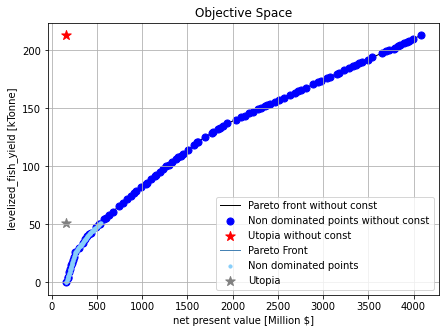

In [6]:
df_large_bound_D = pd.read_excel('results/moo_results/Dbound_optconst_effect/moo_results_large_bound_D.xlsx')
df_large_bound_D_without_const = pd.read_excel('results/moo_results/Dbound_optconst_effect/moo_results_large_bound_D_without_const.xlsx') 

f1_coeff = 100 #1 for cost_per_yield
f2_coeff = -10

df_large_bound_D_f1 = f1_coeff * df_large_bound_D['obj1']
df_large_bound_D_f2 = f2_coeff * df_large_bound_D['obj2']
utopia_large_bound_D = [min(df_large_bound_D_f1), max(df_large_bound_D_f2)] #min of objective
nadir_large_bound_D  = [max(df_large_bound_D_f1), min(df_large_bound_D_f2)] #max of objective

df_large_bound_D_without_const_f1 = f1_coeff * df_large_bound_D_without_const['obj1']
df_large_bound_D_without_const_f2 = f2_coeff * df_large_bound_D_without_const['obj2']
utopia_large_bound_D_without_const = [min(df_large_bound_D_without_const_f1), max(df_large_bound_D_without_const_f2)] #min of objective
nadir_large_bound_D_without_const  = [max(df_large_bound_D_without_const_f1), min(df_large_bound_D_without_const_f2)] #max of objective

plt.figure(figsize=(7, 5))

plt.plot(np.sort(df_large_bound_D_without_const_f1), np.sort(df_large_bound_D_without_const_f2), linewidth=1, zorder=1, color='black', label="Pareto front without const")
plt.scatter(df_large_bound_D_without_const_f1, df_large_bound_D_without_const_f2, s=50, facecolors='blue', edgecolors='blue', label="Non dominated points without const")
plt.scatter(utopia_large_bound_D_without_const[0], utopia_large_bound_D_without_const[1], facecolors='red', edgecolors='red', marker="*", s=100, label="Utopia without const")

plt.plot(np.sort(df_large_bound_D_f1), np.sort(df_large_bound_D_f2), linewidth=1, zorder=1, color='steelblue', label="Pareto Front")
plt.scatter(df_large_bound_D_f1, df_large_bound_D_f2, s=10, facecolors='lightskyblue', edgecolors='lightskyblue', label="Non dominated points")
plt.scatter(utopia_large_bound_D[0], utopia_large_bound_D[1], facecolors='gray', edgecolors='gray', marker="*", s=100, label="Utopia")

plt.title("Objective Space")
plt.xlabel('net present value [Million $]')
plt.ylabel('levelized_fish_yield [kTonne]')
#plt.gca().invert_yaxis()
plt.legend()
plt.grid()

name='pareto_realobj'
plt.savefig('results//moo_results/Dbound_optconst_effect/' + name + '.pdf' )
plt.savefig('results//moo_results/Dbound_optconst_effect/' + name + '.png', bbox_inches = "tight")

[0. 1.]


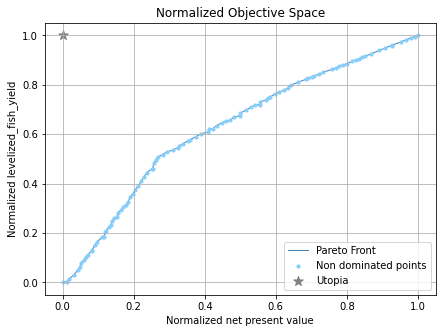

In [7]:
df_large_bound_F_all = np.array([*zip(df_large_bound_D_f1, df_large_bound_D_f2)])
utopia_large_bound_D = [min(df_large_bound_D_f1), max(df_large_bound_D_f2)] #min of objective
utopia_large_bound_D_i = np.array([min(df_large_bound_D_f1), min(df_large_bound_D_f2)]) #min of objective
nadir_large_bound_D_i  = np.array([max(df_large_bound_D_f1), max(df_large_bound_D_f2)]) #max of objective
nF_large_bound_D = (df_large_bound_F_all - utopia_large_bound_D_i) / (nadir_large_bound_D_i- utopia_large_bound_D_i)
utopia_large_bound_D_scaled = (utopia_large_bound_D - utopia_large_bound_D_i) / (nadir_large_bound_D_i- utopia_large_bound_D_i)
print(utopia_large_bound_D_scaled)

plt.figure(figsize=(7, 5))

plt.plot(np.sort(nF_large_bound_D[:, 0]), np.sort(nF_large_bound_D[:, 1]), linewidth=1, zorder=1, color='steelblue', label="Pareto Front")
plt.scatter(nF_large_bound_D[:,0], nF_large_bound_D[:,1], s=10, facecolors='lightskyblue', edgecolors='lightskyblue', label="Non dominated points")
plt.scatter(utopia_large_bound_D_scaled[0], utopia_large_bound_D_scaled[1], facecolors='gray', edgecolors='gray', marker="*", s=100, label="Utopia")
plt.title("Normalized Objective Space")
plt.xlabel('Normalized net present value')
plt.ylabel('Normalized levelized_fish_yield')
plt.legend()
plt.grid()
plt.show()

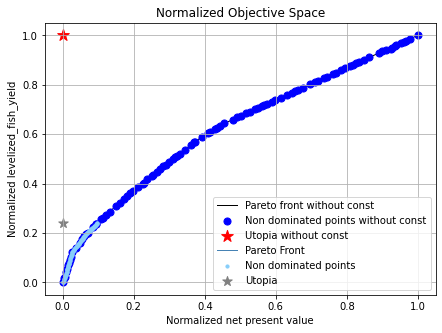

In [8]:
df_large_bound_F_all = np.array([*zip(df_large_bound_D_f1, df_large_bound_D_f2)])
utopia_large_bound_D = [min(df_large_bound_D_f1), max(df_large_bound_D_f2)] #min of objective
utopia_large_bound_D_i = np.array([min(df_large_bound_D_f1), min(df_large_bound_D_f2)]) #min of objective
nadir_large_bound_D_i  = np.array([max(df_large_bound_D_f1), max(df_large_bound_D_f2)]) #max of objective

df_large_bound_without_const_F_all = np.array([*zip(df_large_bound_D_without_const_f1, df_large_bound_D_without_const_f2)])
utopia_large_bound_D_without_const = [min(df_large_bound_D_without_const_f1), max(df_large_bound_D_without_const_f2)] #min of objective
utopia_large_bound_D_without_const_i = np.array([min(df_large_bound_D_without_const_f1), min(df_large_bound_D_without_const_f2)]) #min of objective
nadir_large_bound_D_without_const_i  = np.array([max(df_large_bound_D_without_const_f1), max(df_large_bound_D_without_const_f2)]) #max of objective

total_utopia = np.minimum(utopia_large_bound_D_i, utopia_large_bound_D_without_const_i)
total_nadir = np.maximum(nadir_large_bound_D_i, nadir_large_bound_D_without_const_i)

nF_large_bound_D_without_const = (df_large_bound_without_const_F_all - total_utopia) / (total_nadir- total_utopia)
nF_large_bound_D = (df_large_bound_F_all - total_utopia) / (total_nadir- total_utopia)

utopia_large_bound_D_without_const_scaled = (utopia_large_bound_D_without_const - total_utopia) / (total_nadir- total_utopia)
utopia_large_bound_D_scaled = (utopia_large_bound_D - total_utopia) / (total_nadir- total_utopia)


plt.figure(figsize=(7, 5))

plt.plot(np.sort(nF_large_bound_D_without_const[:,0]), np.sort(nF_large_bound_D_without_const[:,1]), linewidth=1, zorder=1, color='black', label="Pareto front without const")
plt.scatter(nF_large_bound_D_without_const[:,0], nF_large_bound_D_without_const[:,1], s=50, facecolors='blue', edgecolors='blue', label="Non dominated points without const")
plt.scatter(utopia_large_bound_D_without_const_scaled[0],utopia_large_bound_D_without_const_scaled[1], facecolors='red', edgecolors='red', marker="*", s=150, label="Utopia without const")

plt.plot(np.sort(nF_large_bound_D[:, 0]), np.sort(nF_large_bound_D[:, 1]), linewidth=1, zorder=1, color='steelblue', label="Pareto Front")
plt.scatter(nF_large_bound_D[:,0], nF_large_bound_D[:,1], s=10, facecolors='lightskyblue', edgecolors='lightskyblue', label="Non dominated points")
plt.scatter(utopia_large_bound_D_scaled[0],utopia_large_bound_D_scaled[1], facecolors='gray', edgecolors='gray', marker="*", s=100, label="Utopia")
plt.title("Normalized Objective Space")
plt.xlabel('Normalized net present value')
plt.ylabel('Normalized levelized_fish_yield')
plt.legend()
plt.grid()


name='pareto_normilized'
plt.savefig('results//moo_results/Dbound_optconst_effect/' + name + '.pdf' )
plt.savefig('results//moo_results/Dbound_optconst_effect/' + name + '.png', bbox_inches = "tight")